<a href="https://colab.research.google.com/github/VimalChamyal/Linear-Regression/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
url = 'https://raw.githubusercontent.com/VimalChamyal/Linear-Regression/main/accountant_salary.csv'
df1 = pd.read_csv(url)
# Loading the dataset from github and putting in up on the pandas dataframe
# Important to note that we are loading the raw data from the github file

In [12]:
df1

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
0,1,1,0,4,3,9.6,4,89661
1,1,1,1,9,4,3.6,3,105336
2,1,0,0,13,2,6.9,2,91402
3,1,1,1,2,3,8.9,1,96137
4,1,2,1,13,5,7.5,4,113364
...,...,...,...,...,...,...,...,...
1008,1,2,0,11,5,5.1,1,96438
1009,1,2,0,4,0,9.1,1,85523
1010,1,1,1,6,5,6.3,2,100476
1011,1,1,1,13,5,6.6,1,107083


In [17]:
df1.head(10)
# This shows the 1st 10 rows
# the categorical features have already been converted to 0, 1, 2
# 0 in degree is no degree and 1 means degree is there
# 0 no masters, 1 he/she is pursuing masters and 2 means that the person has got a masters degree already
# 0 means there's no professional membership and 1 means registered for a professional membership
# 1 is small, 2 medium, 3 large, 4 mnc

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
0,1,1,0,4,3,9.6,4,89661
1,1,1,1,9,4,3.6,3,105336
2,1,0,0,13,2,6.9,2,91402
3,1,1,1,2,3,8.9,1,96137
4,1,2,1,13,5,7.5,4,113364
5,1,2,0,3,0,9.0,3,79799
6,1,1,1,8,3,9.7,1,106253
7,1,1,0,6,1,4.7,4,80808
8,1,1,0,11,2,2.2,2,90258
9,1,0,0,9,4,6.6,2,90976


In [19]:
df1.info()
# To get a quick insight of the dataset, non null count and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   degree                      1013 non-null   int64  
 1   masters                     1013 non-null   int64  
 2   professional_membership     1013 non-null   int64  
 3   years_experience            1013 non-null   int64  
 4   audit_experience            1013 non-null   int64  
 5   IT_skill_rate               1013 non-null   float64
 6   Size_of_the_company_worked  1013 non-null   int64  
 7   salary_per_year             1013 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 63.4 KB


In [21]:
df1.describe()
# Quick statistical summary of the data

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,0.991115,0.992103,0.514314,8.599210,2.508391,5.532280,2.451135,94359.632774
std,0.093884,0.816055,0.500042,3.950944,1.730675,2.604028,1.128516,8526.685211
min,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,69373.000000
25%,1.000000,0.000000,0.000000,5.000000,1.000000,3.300000,1.000000,88544.000000
50%,1.000000,1.000000,1.000000,9.000000,3.000000,5.500000,2.000000,93870.000000
75%,1.000000,2.000000,1.000000,12.000000,4.000000,7.900000,3.000000,100299.000000
max,1.000000,2.000000,1.000000,15.000000,5.000000,9.900000,4.000000,119708.000000


In [23]:
df1.describe().transpose()
# easier to read data

,count,mean,std,min,25%,50%,75%,max
degree,1013.0,0.991115,0.093884,0.0,1.0,1.0,1.0,1.0
masters,1013.0,0.992103,0.816055,0.0,0.0,1.0,2.0,2.0
professional_membership,1013.0,0.514314,0.500042,0.0,0.0,1.0,1.0,1.0
years_experience,1013.0,8.599210,3.950944,2.0,5.0,9.0,12.0,15.0
audit_experience,1013.0,2.508391,1.730675,0.0,1.0,3.0,4.0,5.0
IT_skill_rate,1013.0,5.532280,2.604028,1.0,3.3,5.5,7.9,9.9
Size_of_the_company_worked,1013.0,2.451135,1.128516,1.0,1.0,2.0,3.0,4.0
salary_per_year,1013.0,94359.632774,8526.685211,69373.0,88544.0,93870.0,100299.0,119708.0


In [24]:
df1['salary_per_year']

0        89661
1       105336
2        91402
3        96137
4       113364
         ...  
1008     96438
1009     85523
1010    100476
1011    107083
1012     82310
Name: salary_per_year, Length: 1013, dtype: int64

In [25]:
df1['salary_per_year'] > 115000

0       False
1       False
2       False
3       False
4       False
        ...  
1008    False
1009    False
1010    False
1011    False
1012    False
Name: salary_per_year, Length: 1013, dtype: bool

In [26]:
max(df1['salary_per_year'])

119708

In [27]:
min(df1['salary_per_year'])

69373

In [28]:
df1[df1['salary_per_year'] > 115000]

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
97,1,2,1,14,5,5.6,3,115944
218,1,2,1,15,4,4.4,2,115506
447,1,2,1,14,4,7.3,3,116815
636,1,2,1,15,4,7.5,2,119708
749,1,0,1,15,5,8.4,1,116087
878,1,1,1,14,5,8.3,2,118072


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


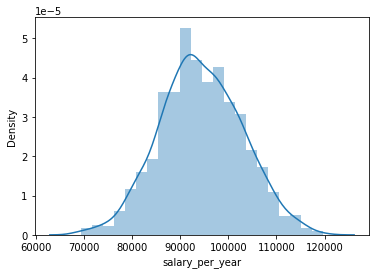

In [102]:
sns.distplot(df1['salary_per_year'])
# check the distribution of salary
# most of the accountants are drawing around 80.5k to 10.5k

In [104]:
df1.corr()
# How are features correlated to each other

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
degree,1.000000,-0.000917,-0.049910,0.019694,0.009582,0.037955,0.056521,0.059452
masters,-0.000917,1.000000,-0.060261,0.041311,-0.039833,-0.023037,0.031770,0.188059
professional_membership,-0.049910,-0.060261,1.000000,-0.022102,0.013848,-0.022400,-0.061360,0.550464
years_experience,0.019694,0.041311,-0.022102,1.000000,-0.001964,0.004937,-0.046505,0.539229
audit_experience,0.009582,-0.039833,0.013848,-0.001964,1.000000,-0.052321,-0.024960,0.376497
IT_skill_rate,0.037955,-0.023037,-0.022400,0.004937,-0.052321,1.000000,-0.007045,0.185843
Size_of_the_company_worked,0.056521,0.031770,-0.061360,-0.046505,-0.024960,-0.007045,1.000000,0.029152
salary_per_year,0.059452,0.188059,0.550464,0.539229,0.376497,0.185843,0.029152,1.000000


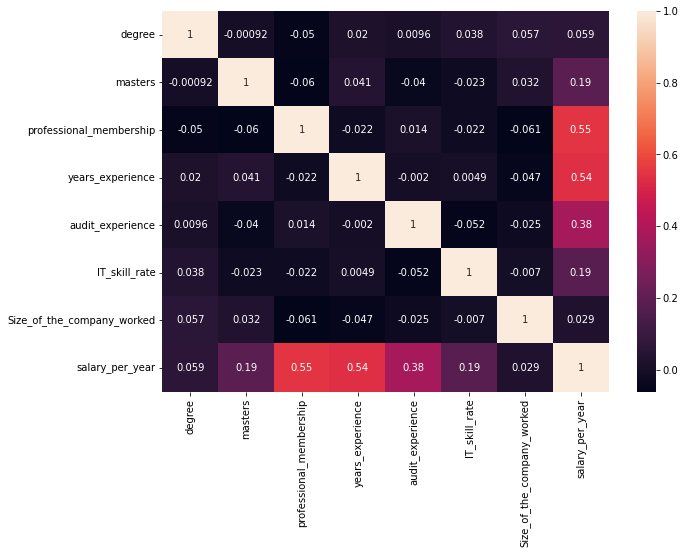

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(),annot = True)

# annot = True, setting this up enables us to seee the values

In [38]:
df1.columns
# To see all the column names

Index(['degree', 'masters', 'professional_membership', 'years_experience',
       'audit_experience', 'IT_skill_rate', 'Size_of_the_company_worked',
       'salary_per_year'],
      dtype='object')

In [45]:
# Uptill here we were doing data exploration stuff, now we will go ahead and split the data
# First we should seperate the dependent and the independent variables

In [46]:
X = df1.drop('salary_per_year', axis=1)
# X has the input features
y = df1['salary_per_year']
# y has the column that has the labelled values

In [47]:
y.head()

0     89661
1    105336
2     91402
3     96137
4    113364
Name: salary_per_year, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

# We can get this piece of code just by writing, train_test_split

In [51]:
len(df1)

1013

In [54]:
len(X_test), len(y_test), len(X_train), len(y_train)

(335, 335, 678, 678)

In [56]:
# Create the model and predict
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train, y_train)

LinearRegression()

In [60]:
prediction = model.predict(X_test)

In [63]:
# Check the prediction, (model performance)
prediction

array([ 97624.82166637,  90888.64024244, 100550.96548128,  95001.54802934,
        95716.26965652,  88043.67294003,  98048.34689682,  99388.30213952,
        99131.01562773,  95648.0930036 , 103030.63978834, 104875.81512026,
        98224.0140496 ,  94127.00582185,  88388.3772683 , 105708.3719143 ,
        95641.828923  ,  97218.18198915,  97829.40578788,  95465.52429452,
        96429.30048465,  96063.24447103,  82585.92084436, 107159.21579014,
        99898.924843  ,  90922.78686994,  97962.93212172,  80972.35686033,
        92083.90250521,  99136.28966368,  97563.04577348,  83927.14698791,
        91154.77221564,  95972.52427384,  98326.94476735,  89273.50146118,
        94051.28059618,  90247.7124242 ,  99192.43490111,  86874.81696687,
        85854.40932666,  71293.81898064, 101130.25644863,  93414.95693724,
        87464.91307088,  98108.42659235, 108464.33715414,  98516.40584742,
        91749.9678769 ,  85967.8194393 ,  79230.68340742,  88393.58802556,
        80679.48391526,  

In [64]:
prediction[0]

97624.82166636703

In [65]:
y_test

689     93571
518     87150
940    105760
96      93330
578    102614
        ...  
79     104592
148     88503
302     73297
464    101318
712     77927
Name: salary_per_year, Length: 335, dtype: int64

In [66]:
# To access the index of the y_test we need to convert it into a numpy array
np_y_test = np.array(y_test)

In [68]:
np_y_test[0]

93571

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
mean_absolute_error(y_test, prediction)

2754.2851254472134

In [72]:
print("Mean Absolute error: ", mean_absolute_error(y_test, prediction))

Mean Absolute error:  2754.2851254472134


In [74]:
print("Mean Squared error: ", mean_squared_error(y_test, prediction))

Mean Squared error:  10641378.164973492


In [76]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, prediction)))

RMSE:  3262.112531010157


In [79]:
prediction[0] - np_y_test[0]
# we can see that the RMSE is the closest to the actual error so we can go ahead with that

4053.821666367032

In [93]:
# To check the performance at each index level
index_position = 0
np_y_test = np.array(y_test)
actual = np_y_test[index_position]
pred = round(prediction[index_position], 2)
diff = round(actual - pred, 2)
perc = round (diff/actual *100, 2)
print('Actual     : ' + str(actual))
print('Prediction : ' + str(pred))
print('Error      : ' + str(diff))
print('Error %    : ' + str(perc) + '%')

Actual     : 93571
Prediction : 97624.82
Error      : -4053.82
Error %    : -4.33%
